# Assignment 1.3
### Jakub Iliński 346796

### data preparation

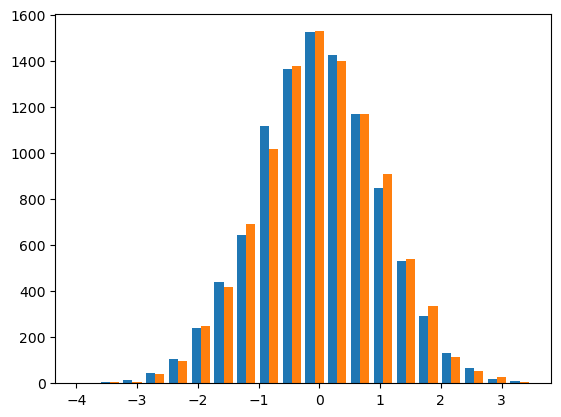

(10000, 2)

In [57]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import KNeighborsClassifier
from tqdm.auto import tqdm
import seaborn as sns

data = np.random.randn(10000, 2)
rng = np.random.default_rng()
plt.hist(data, bins=20) # small test
plt.show()
data.shape

In [64]:
res = k_means(3, data, 4000)
df = pd.DataFrame(res)

100%|██████████| 4000/4000 [01:25<00:00, 46.94it/s]


In [71]:
df['cumulative average'].iloc[4000 - 1] - df['cumulative average'].iloc[4000 - 2]

2.0849252435617416e-07

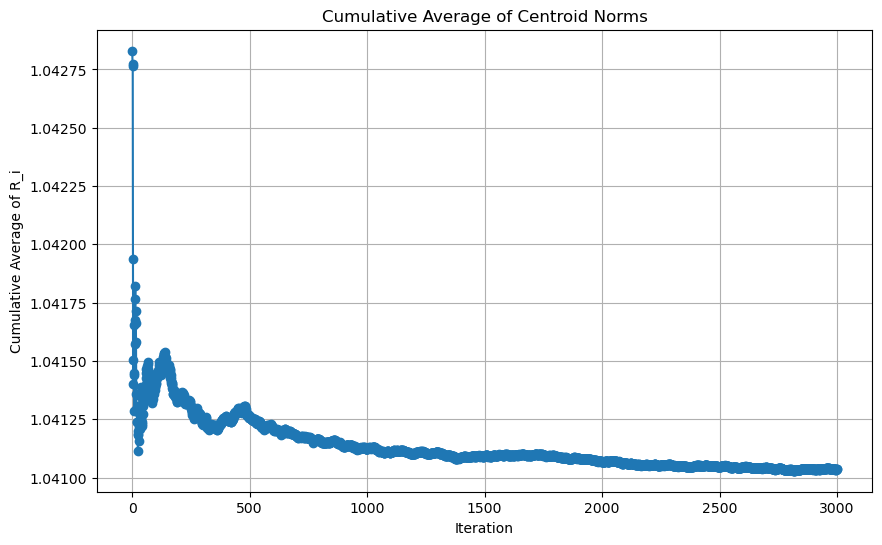

Achieved 9-digit accuracy at iteration 2403


In [41]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Number of samples and clusters
n_samples = 10000
k_clusters = 3
iterations = 3000  # Increase if needed

# Store R_i values
R_values = []

samples = np.random.randn(n_samples, 2)  # Mean=0, Std=1 for both dimensions
for i in range(iterations):
    # Step 1: Generate samples from a 2D Gaussian distribution
    
    # Step 2: Apply k-means clustering
    kmeans = KMeans(n_clusters=k_clusters, random_state=None)
    kmeans.fit(samples)

    # Step 3: Calculate norms of centroids
    centroids = kmeans.cluster_centers_
    norms = np.linalg.norm(centroids, axis=1)

    # Step 4: Average the norms
    R_i = np.mean(norms)
    R_values.append(R_i)

# Step 6: Calculate cumulative averages
R_values = np.array(R_values)
cumulative_averages = np.cumsum(R_values) / np.arange(1, iterations + 1)

# Step 7: Plot the cumulative averages
plt.figure(figsize=(10, 6))
plt.plot(cumulative_averages, marker='o', linestyle='-')
plt.title('Cumulative Average of Centroid Norms')
plt.xlabel('Iteration')
plt.ylabel('Cumulative Average of R_i')
plt.grid(True)
plt.show()

# Step 8: Estimate the number of iterations needed for 9-digit accuracy
tolerance = 1e-9
for n in range(1, iterations):
    # Check the difference between consecutive cumulative averages
    if abs(cumulative_averages[n] - cumulative_averages[n - 1]) < tolerance:
        print(f"Achieved 9-digit accuracy at iteration {n + 1}")
        break
else:
    print("9-digit accuracy not achieved within the given iterations.")